# Anscombe's Quartet Tutorial

Author: Matthew K. MacLeod

## Tutorial goals:

* explore some simple statistics
* illustrate the importance of visualization
* robust vs non-robust statistics
* create and use pandas data frames
* fit a simple linear regression
* the role of outliers
* explore bayesian approach

## Background

The Anscombe data set shows multiple groups of data which have similiar summary statistics, **but** as we will see, there are some differences in the simple statistics, which will made clear by the distinction of robust and non-robust statistics. 

This data set was created by the statistician Francis Anscombe in 1973 to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties.

There is also an interesting paper by Chattergee and Firat on how to derive arbitrary amounts of data that fit these criteria:

http://www.tandfonline.com/doi/abs/10.1198/000313007X220057#.VjDpsZeUirM


### Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

### Load the Seaborn Anscombe data set

In [3]:
anscombe = sns.load_dataset("anscombe")
#anscombe
#anscombe.describe() # does not work need to break up

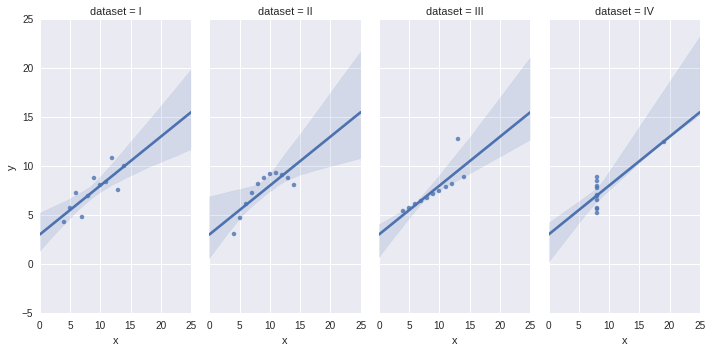

In [4]:
sns.lmplot(x="x", y="y", col="dataset", data=anscombe, aspect=.5);

### Visualization

Plotting the data allows one to see that while each quartet is fit by the same linear function, the grouping and clustering of the data is different in each case. This can be quickly seen by plotting.

Recall:

* a picture is worth a thousand words

## Build up our own Pandas data frame

start with numpy arrays

In [5]:
x1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
x2 = np.array([10,8,13,9,11,14,6,4,12,7,5])
x3 = np.array([10,8,13,9,11,14,6,4,12,7,5])
x4 = np.array([8, 8, 8,8,8,8,8,19,8,8,8])

y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8,8,8,8,8,8,8,19,8,8,8])
y4 = np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

a_xs = [x1,x2,x3,x4]
a_ys = [y1,y2,y3,y4]

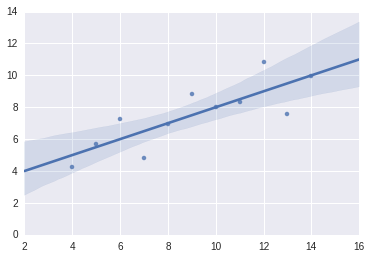

In [6]:
sns.regplot(x=x1, y=y1)

### Load local pdapt libraries

In [7]:
import os
os.chdir('/home/matej/develop/pdapt')
os.getcwd()

'/home/matej/develop/pdapt'

In [8]:
# import my statistical library (pdapt stats)
import pdapt_lib.machine_learning.stats as pstats

In [9]:
pstats.standard_deviation(x1)

3.3166247903554

## Summary statistics

Notice that the robust statistics like the median, interquartile range (IQR), etc, **do** vary while the non-robust statisics: mean and standard deviation do not and very similar for each x and y data set in the quartet.

In [10]:
# summary stats for each set should be same eg compare means
for x in a_xs:
    pstats.summary(x)
    print()

Minimum:   4.000000
Q1:        5.000000
Median:    9.000000
Q3:        11.000000
Maximum:   14.000000
IQR:       6.000000
Outliers +/- 1.5 IQR: []

Mean:      9.000000
Std dev:   3.316625

Minimum:   4.000000
Q1:        5.000000
Median:    9.000000
Q3:        11.000000
Maximum:   14.000000
IQR:       6.000000
Outliers +/- 1.5 IQR: []

Mean:      9.000000
Std dev:   3.316625

Minimum:   4.000000
Q1:        5.000000
Median:    9.000000
Q3:        11.000000
Maximum:   14.000000
IQR:       6.000000
Outliers +/- 1.5 IQR: []

Mean:      9.000000
Std dev:   3.316625

Minimum:   8.000000
Q1:        8.000000
Median:    8.000000
Q3:        8.000000
Maximum:   19.000000
IQR:       0.000000
Outliers +/- 1.5 IQR: [19]

Mean:      9.000000
Std dev:   3.316625



In [11]:
for y in a_ys:
    pstats.summary(y)
    print()

Minimum:   4.260000
Q1:        4.820000
Median:    7.580000
Q3:        8.330000
Maximum:   10.840000
IQR:       3.510000
Outliers +/- 1.5 IQR: []

Mean:      7.500909
Std dev:   2.031568

Minimum:   3.100000
Q1:        4.740000
Median:    8.140000
Q3:        8.770000
Maximum:   9.260000
IQR:       4.030000
Outliers +/- 1.5 IQR: []

Mean:      7.500909
Std dev:   2.031657

Minimum:   5.390000
Q1:        5.730000
Median:    7.110000
Q3:        7.810000
Maximum:   12.740000
IQR:       2.080000
Outliers +/- 1.5 IQR: [12.74]

Mean:      7.500000
Std dev:   2.030424

Minimum:   5.250000
Q1:        5.560000
Median:    7.040000
Q3:        7.910000
Maximum:   12.500000
IQR:       2.350000
Outliers +/- 1.5 IQR: [12.5]

Mean:      7.500909
Std dev:   2.030579



In [12]:
# This value shows a close grouping in the y ranges of the data
pstats.interquartile_range(y3)

2.0799999999999992

In [13]:
# This value shows a close grouping in the x ranges of the data
pstats.interquartile_range(x4)

0

In [14]:
# print out y4 and standarized equivalent..
# note standardized value of 12.5 is above abs(2) 
#   which is another definition of and an outlier
s = list(zip(y4, pstats.standardize(y4)))
sorted(s,key=lambda x: abs(x[1]))

[(7.71, 0.10297110302227465),
 (7.9100000000000001, 0.20146520156531966),
 (7.04, -0.22698412709692586),
 (6.8899999999999997, -0.30085470100420975),
 (6.5800000000000001, -0.4535205537459292),
 (8.4700000000000006, 0.47724867748584576),
 (8.8399999999999999, 0.65946275979047853),
 (5.7599999999999998, -0.85734635777241364),
 (5.5599999999999996, -0.95584045631545866),
 (5.25, -1.1085063090571781),
 (12.5, 2.4619047631282012)]

### Outliers

Some notes:

* The 3rd and 4th parts of the dataset (quartet) have outliers which skew the mean and standard deviation to be equal to the other cases.

* Especially in cases of small sample sizes, it is not necessarily true that the outliers should be removed, they may be part of the naturally occuring underlying distribution of the population of interest. On the other hand, the outliers could be due to instrument failure, or the result of someone answering the wrong question.

* *one must investigate the outliers!*

## Linear Regression

To fit a linear regression

https://en.wikipedia.org/wiki/Linear_regression

we need to solve a general linear equation, 

 $\mathbf{Ax} = \mathbf{b}$
 
https://en.wikipedia.org/wiki/System_of_linear_equations
 
but here we are solving for the coefficients (weights) so looks more like

$\mathbf{A w}=\mathbf{y}$


 

In [23]:
from numpy import arange,array,ones,linalg
from pylab import plot,show

# simple example
xi = arange(0,9)
A = array([ xi, ones(9)])
print(A)
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]
# solve it
w = linalg.lstsq(A.T,y)[0]
print(w)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[  0.71666667  19.18888889]


### Simple regression

the theory of regression to the mean has some nice relationships. For example,
to solve the following:

$\mathbf{y} =  \mathrm{w_0} \mathbf{x} + \mathrm{w_1}$,

use the statistical relations:

$\mathrm{w_0} = \frac{\hat{\rho}(\mathbf{x},\mathbf{y}) \hat{\sigma}_y} {\hat{\sigma}_x}$

and

$\mathrm{w_1} = \bar{\mathbf{y}} - \mathrm{w_0} \bar{\mathbf{x}}$


where $\hat{\rho}$ is the sample correlation between **x** and **y** and $\hat{\sigma}$ is the sample standard deviation.


In [22]:
# test the above 
w0_stat = pstats.correlation(xi,y)*pstats.standard_deviation(y)/pstats.standard_deviation(xi)
w1_stat = pstats.mean(y) - w0_stat*pstats.mean(xi)
print(w0_stat,w1_stat)

0.716666666667 19.1888888889


0.716666666667 19.1888888889 0.955949031197 5.65761249232e-05 0.0831744517144


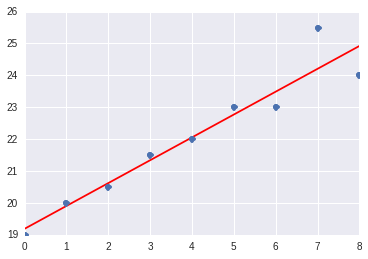

In [16]:
# could have used scipy
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
print(slope, intercept, r_value, p_value, std_err)

line = w[0]*xi+w[1]
plot(xi,line,'r-',xi,y,'o')
show()

## Bayesian analysis

## Summary

* Some simple statistics **do** differ for the anscombe dataset (median etc)

* outliers can complicate interpretation and should be carefully considered

 note see file mkm_notebooks/license.txt for license of this notebook.